<a href="https://colab.research.google.com/github/ToAN7/SIC_AI/blob/TrongKha_/SIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

#import thư viện

In [ ]:
from sklearn.svm import SVR# mô hình chạy thử
from sklearn.svm import SVC# mô hình chạy thử
from sklearn.neighbors import KNeighborsClassifier# mô hình chạy thử
import pandas as pd# lấy dữ liệu
import numpy as np # tính toán
import matplotlib.pyplot as plt # vẽ đồ thị
from sentence_transformers import SentenceTransformer # Doc2Vec với dữ liệu dùng để kiểm thử
from sklearn.cluster import KMeans # Clustering
from sklearn.model_selection import train_test_split # Chia dữ liệu
from sklearn.model_selection import cross_val_score, KFold # đánh giá mô hình
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #đánh giá mô hình
import re # tiền xử lý
import string # tiền xử lý
from sklearn.decomposition import PCA # giảm chiều dữ liệu
from scipy.spatial.distance import pdist, squareform # Tìm tâm cụm
from sklearn.metrics.pairwise import euclidean_distances #tính khoảng cách đầu vào và so sánh với tâm cụm
from sklearn.svm import OneClassSVM # Phân loại
from sklearn.feature_extraction.text import TfidfVectorizer # Tính tfidf
import joblib
import warnings # ngăn cảnh báo vô hại

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


#Hàm

In [ ]:
vietnamese_stop_words = [
              'là', 'và', 'có', 'trên', 'cho', 'một', 'các', 'được', 'như', 'với',
              'của', 'ở', 'khi', 'đã', 'còn', 'thì', 'này', 'bởi', 'đó', 'để', 'năm',
              'ngày', 'vào', 'sau', 'tại', 'trong', 'rằng', 'đến', 'từ'
              ]

In [ ]:
pca = PCA(n_components=2)

In [ ]:
model = SentenceTransformer('/content/drive/MyDrive/SIC/model_doc2vec')

In [ ]:
model_kmeans = joblib.load('/content/drive/MyDrive/SIC/kmeans_model.pkl')

In [ ]:
#Hàm làm sạch dữ liệu <nên dùng trước khi vector hoá dữ liệu>
def convertData(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+',b'',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub(' +', ' ',text)
  text = text.strip()
  text = ' '.join([word for word in text.split() if word not in vietnamese_stop_words])
  return text

<h2>Cosine_similarity

In [ ]:
# #Hàm tính độ đo cosine
# def cosine_similarity(x_vec,y_vec):
#   cosine_similarities = []
#   for i in range(x_vec.shape[0]):
#     cos_sim = (x_vec[i] * y_vec.T).toarray().squeeze()
#     cosine_similarities.append(cos_sim)
#   return cosine_similarities

def cosine_similarity(x_vec,y_vec):
  cosine_similarities = x_vec.dot(y_vec.T)
  return cosine_similarities.toarray().squeeze()

In [ ]:
#Hàm kiểm thử cho đánh giá độ tương đồng Cosine
def Cosine_sml(lt, data_test, len_real):#data_test và len_real là list:8943
  for i in range(len(data_test)):
    content = [convertData(txt) for txt in data_test[i]['Content']]
    vectors_content = vectorizer.transform(content)
    cosine_similarities = cosine_similarity(vectors_content,real_vectors)
    danhgia_r = 0
    danhgia_f = 0
    for idx, x in enumerate(cosine_similarities):
      if x.max() > 0.5:
        danhgia_f +=1
        # if idx >= len_real[i]:
        #   danhgia_fir +=1
      # if x.max() < 0.5:
      #   lt.append(idx)
    # print(f'Số lượng tin có khả năng là thật của data_test{i} : {danhgia_r}')
    print(f'Tổng số tin giả của data_test{i} : {len(data_test[i])}')
    print(f'Số lượng tin được phát hiện có khả năng là giả của data_test{i}: {danhgia_f}')
    # print(f"Tỉ lệ tin có khả năng là thật data_test{i}: {(danhgia_)/(len(data_test[i]))}")
    # print(f'Độ chênh lệch giữa dự đoán và kết quả số tin thật: {abs(danhgia_r - len_real[i])}')
    print(f"Độ chính xác khi dự đoán tin giả : {danhgia_f/len(data_test[i])}")
    # print(f"Độ chính xác trong việc dự đoán tin giả data_test{i}: { 1 - (danhgia_fir/(len(data_test[i])-len_real[i] )) } ")
    # lt.append(1 - (danhgia_fir/(len(data_test[i]))))
    lt.append(danhgia_f/len(data_test[i]))
    print('_____________________________________________________________________________________')
  return lt

<h2> Kmeans </h2>

In [ ]:
#hàm này tính ngưỡng cho Kmeans
def caculate_thresholds(model, data, cluster_numb):
  ans = []
  data = pca.fit_transform(data)
  if cluster_numb > model.n_clusters or cluster_numb == None:
    return None
  for i in range(model.n_clusters):
    cluster_ = data[model.labels_ == i]
    distance = model.transform(cluster_)
    min_distance = distance.min(axis=1)
    max_distance = distance.max(axis=1)
    threshold = (max_distance.sum()/len(max_distance)) - (min_distance.sum()/len(min_distance))
    ans.append(threshold)
  return ans

In [ ]:
#Hàm dùng của Kmeans
def isFake(text, ths):
  # list_test.append(text)# nhằm lưu lại các text đã dùng
  propress_text = convertData(text)
  ebd_text = model.encode(propress_text)
  ebd_text = pca.transform(ebd_text.reshape(1,-1))#.reshape(1,-1)
  toadoy = ebd_text[0][1]
  toadox = ebd_text[0][0]
  canhhuyen = np.sqrt(toadox**2 + toadoy**2)
  if canhhuyen > ths[0]:
    return False
  else:
    return True

In [ ]:
def Kmeans_danhgia(lt_km, data_test, ths):
  warnings.filterwarnings("ignore", message="X does not have valid feature names, but PCA was fitted with feature names")
  for i in data_test:
    dem = 0
    for id,j in enumerate(i['Content']):
      if isFake(j,ths) == False:
        dem+=1
    print(f'Tổng số lượng tin giả{len(i)}')
    print(f'Số lượng tin có khả năng là giả được phát hiện data_test : {dem}')

    print(f'Độ chính xác: {(dem)/len(i)}')
    print('_______________________________________________________________')
    lt_km.append((dem)/len(i))# tỉ lệ đoán được tin có khả năng là giả
    return lt_km

In [ ]:
def trucquanhoa_Kmeans(data,model_kmeans, ebd_text):

  plt.figure(figsize=(10, 6))

  plt.scatter(data[:,0], data[:, 1], c=model_kmeans.labels_, cmap='cividis')
  plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
  plt.scatter(centroid[0][0],centroid[1][1],marker='o',color='red',s=130)
  plt.scatter(ebd_text[0][0],ebd_text[0][1]+centroid[1][1],marker='o',color='blue',s=20)
  #
  #tìm ra ngưỡng thích hợp làm ngưỡng chung
  circle = plt.Circle((centroid [0][0],centroid[1][1]), radius=ths[0], color='red', fill=False, linestyle='--')
  plt.gca().add_patch(circle)


  ##Vẽ đồ thị để hình dung cách tính khoảng cách

  plt.axvline(x=centroid[0][0], color='r', linestyle='-')
  plt.axhline(y=centroid[1][1],color='blue')

  plt.axhline(y=ebd_text[0][1]+centroid[1][1],color='black')
  plt.axvline(x=ebd_text[0][0], color='r', linestyle='-')
  # plt.axhline(y=ths[0] + centroid[1][1],color='blue')
  # plt.axvline(x=0, color='gray', linestyle='--')
  # plt.axhline(y=0, color='gray', linestyle='--')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('K-means Clustering')
  plt.show()

#Gọi dữ liệu test

In [ ]:
ttg1 = pd.read_csv('/content/drive/MyDrive/Data_/tep_tin_gia_tu_gpt.csv')
ttg2 = pd.read_csv('/content/drive/MyDrive/Data_/test.csv')

In [ ]:
ttg1.columns = ['Content']
print(ttg2.columns)

Index(['Content'], dtype='object')


In [ ]:
teptingia = pd.concat([ttg1,ttg2])

In [ ]:
teptingia.reset_index(inplace=True)
teptingia.to_csv("/content/drive/MyDrive/Data_/Data_test_300/DATA_F.csv")

In [ ]:
#Tập dữ liệu gốc ~ dùng với độ đo cosine
real_news = pd.read_csv('/content/drive/MyDrive/Data_/Data_test_300/DATA_.csv')#Tập tin có thể là thật
teptingia = pd.read_csv('/content/drive/MyDrive/Data_/Data_test_300/DATA_F.csv')#Tập tin có thể là giả
teptingia.drop(columns=['Unnamed: 0'],inplace=True)
# teptingia.columns = ['Content']
teptingia.reset_index(inplace=True)

In [ ]:
teptingia.drop(columns=['index'],inplace=True)

In [ ]:
teptingia.drop(columns=['level_0'],inplace=True)

In [ ]:
# k = real_news[:4000]
# k.drop(columns=['Unnamed: 0', 'Date', 'Source'], inplace = True)
# d_test = pd.concat([k,teptingia])
# d_test.reset_index(inplace=True)
# d_test.drop(columns=['index'],inplace=True)#4000 tin thật và 3374 tin giả

#Độ tương đồng Cosine

In [ ]:
vectorizer = TfidfVectorizer()
real_vectors = vectorizer.fit_transform(real_news['Content'])
# data_test = list()
# data_test.append(teptingia)

In [ ]:
lt = list()# để lưu kết quả test
lt_km = list()
lit = []
lit.append(len(real_news))
data_tt = [teptingia]#so sánh giữa tin giả(2817) với dữ liệu tin thật

In [ ]:
teptingia.shape

(2817, 1)

In [ ]:
Cosine_sml(lt,data_tt,lit)#

Tổng số tin giả của data_test0 : 2817
Số lượng tin được phát hiện có khả năng là giả của data_test0: 1130
Độ chính xác khi dự đoán tin giả : 0.40113596024139153
_____________________________________________________________________________________


[0.40113596024139153]

#Kmeans

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SIC/Embeddings_DATA.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [ ]:
# Công đoạn tìm tâm cụm
centroids = model_kmeans.cluster_centers_
# với 4 cụm ta tìm x giữa 2 cụm xa nhau theo trục x và 2 cụm theo trục y
cs1 = centroids[0]
cs2 = centroids[1]
cs3 = centroids[2]
cs4 = centroids[3]
centroid_x = (cs1 + cs2)/2
centroid_y = (cs3 + cs4)/2
centroid = np.array([centroid_x,centroid_y])

In [ ]:
#Công đoạn tính ngưỡng cho từng cụm
for i in range(model_kmeans.n_clusters):
  ths = caculate_thresholds(model_kmeans, data, model_kmeans.n_clusters)


In [ ]:
#array([0.04610376, 0.03291986])
#array([0.58341836, 0.41658164])
pca.explained_variance_ratio_

array([0.58341838, 0.41658162])

In [ ]:
Kmeans_danhgia(lt_km,data_tt, ths)#ths là ngưỡng

Tổng số lượng tin giả2817
Số lượng tin có khả năng là giả được phát hiện data_test : 1075
Độ chính xác: 0.38161164359247424
_______________________________________________________________


[0.38161164359247424]

#SVM_SVC

In [ ]:
# svc_model_nhieu = joblib.load('/content/drive/MyDrive/SIC/svc_model.joblib')

In [ ]:
svc_model_2000 = joblib.load('/content/drive/MyDrive/SIC/svc_model_test_2000_data_xin.joblib')

In [ ]:
teptingia.shape#2817

(2817, 1)

In [ ]:
real_n = real_news[:4000]

In [ ]:
X_Fake = [convertData(teptingia['Content'][i]) for i in range(len(teptingia['Content']))]
X_Real = [convertData(real_n['Content'][i]) for i in range(len(real_n['Content']))]

In [ ]:
X = X_Real + X_Fake
Y = [1]*len(X_Real) + [0]*len(X_Fake)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()#max_features=5000
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
#bert sentence_transformer

In [ ]:
# svc_model_nhieu.fit(X_train_tfidf, y_train)
svc_model_2000.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [ ]:
#Thử với model chạy 2000 dòng dữ liệu xịn
y_pred = svc_model_2000.predict(X_test_tfidf)
#kiểm tra X_test_tfidf
# Calculate the accuracy of the model.

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Display the classification report and confusion matrix.

print("Classification Report:")

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

Accuracy: 95.09%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       542
           1       0.99      0.93      0.96       822

    accuracy                           0.95      1364
   macro avg       0.95      0.96      0.95      1364
weighted avg       0.95      0.95      0.95      1364

Confusion Matrix:
[[533   9]
 [ 58 764]]


#KNN

In [ ]:
import joblib
from joblib import load as ld
knn_model = ld('/content/drive/MyDrive/SIC/knn_model_test.joblib')

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)#
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
y_pred = knn_model.predict(X_test_tfidf)

# Calculate the accuracy of the model.

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

# Display the classification report and confusion matrix.

print("Classification Report:")

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))
#bỏ KMeans

Accuracy: 64.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.59      0.57       542
           1       0.71      0.67      0.69       822

    accuracy                           0.64      1364
   macro avg       0.63      0.63      0.63      1364
weighted avg       0.65      0.64      0.64      1364

Confusion Matrix:
[[319 223]
 [268 554]]


#Vẽ kết quả

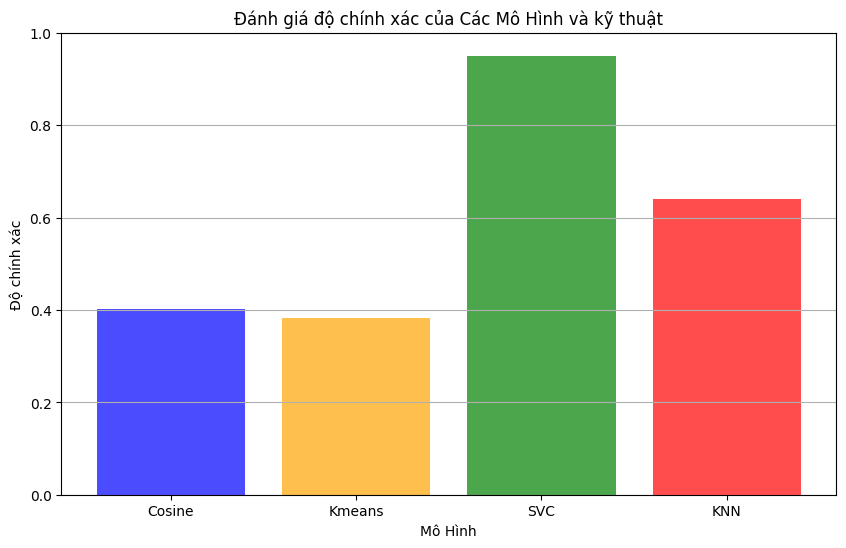

In [ ]:
cs = lt[0]
km = lt_km[0]
models = ['Cosine', 'Kmeans', 'SVC', 'KNN']  # Tên các mô hình
scores = [cs, km, 0.9504, 0.64]  # Tỉ số của từng mô hình

# Thiết lập vị trí cho các cột
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột
plt.bar(x, scores, color=['blue', 'orange', 'green', 'red'], alpha=0.7)

# Thêm nhãn cho các trục và tiêu đề
plt.xticks(x, models)
plt.ylim(0, 1)
plt.xlabel('Mô Hình')
plt.ylabel('Độ chính xác')
plt.title('Đánh giá độ chính xác của Các Mô Hình và kỹ thuật')
plt.grid(axis='y')  # Thêm lưới cho trục y
#Giữ nguyên kết quả tfidf
#bổ sung thêm với thực nghiệm sentence_transformer
#Bỏ Kmeans

#______________________________________________________________________________

In [ ]:
trucquan

In [ ]:
# #Thử với model chạy 6000 dòng dữ liệu dổm
# y_pred = svc_model_nhieu.predict(X_test_tfidf)

# # Calculate the accuracy of the model.

# accuracy = accuracy_score(y_test, y_pred)

# print("Accuracy: {:.2f}%".format(accuracy * 100))

# # Display the classification report and confusion matrix.

# print("Classification Report:")

# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")

# print(confusion_matrix(y_test, y_pred))

In [ ]:
# # 5 tập test
# data_test0 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_114_.csv")
# data_test1 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_140_.csv")
# data_test2 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_155_.csv")
# data_test3 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_166_.csv")
# data_test4 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_200_.csv")

# real_news.drop(columns=['Unnamed: 0'],inplace=True)
# data_test0.drop(columns=['Unnamed: 0'],inplace=True)
# data_test1.drop(columns=['Unnamed: 0'],inplace=True)
# data_test2.drop(columns=['Unnamed: 0'],inplace=True)
# data_test3.drop(columns=['Unnamed: 0'],inplace=True)
# data_test4.drop(columns=['Unnamed: 0'],inplace=True)
# data_test = [data_test0,data_test1,data_test2,data_test3,data_test4]
# len_real = [114,140,155,166,200]

In [ ]:


#Hàm tính độ đo cosine
#Hàm tính độ đo cosine
# def cosine_similarity(x_vec,y_vec):
#   cosine_similarities = []
#   for i in range(x_vec.shape[0]):
#     for j in range(y_vec.shape[0]):
#       dot = (x_vec[i] * y_vec.T[j]).toarray().squeeze()
#       len_vec_x = np.linalg.norm(x_vec[i])
#       len_vec_y = np.linalg.norm(y_vec.T[j])
#       cos_sim = (dot)/(len_vec_x*len_vec_y)
#   cosine_similarities.append()
#   return cosine_similarities
# numb = 0
# def cosine_similarity(x_vec,y_vec):
#   cosine_similarities = x_vec.dot(y_vec.T) / np.outer(np.linalg.norm(x_vec, axis=1),np.linalg.norm(y_vec, axis=1))
#   numb+=1
#   print(numb)
#   return cosine_similarities


In [ ]:
# vectorizer = TfidfVectorizer(max_features=3500)#max_features để 3500 để tránh tình trạng data_test không đủ feature với real_news
# real_vectors = vectorizer.fit_transform(real_news['Content'])

In [ ]:
# fake_newss  = [convertData(txt) for txt in teptingia['Content']]
# fake_vectors = vectorizer.transform(fake_newss)